# Lab 1a

In [53]:
import numpy as np

n = 100
mA = [1.0, 0.5]
mB = [-3.0, 0.0]
sigmaA = 0.5
sigmaB = 0.5

classA = np.random.randn(n, 2) * sigmaA + mA
classB = np.random.randn(n, 2) * sigmaB + mB

classA = classA.transpose()
classB = classB.transpose()

In [54]:
print(classA.shape)

(2, 100)


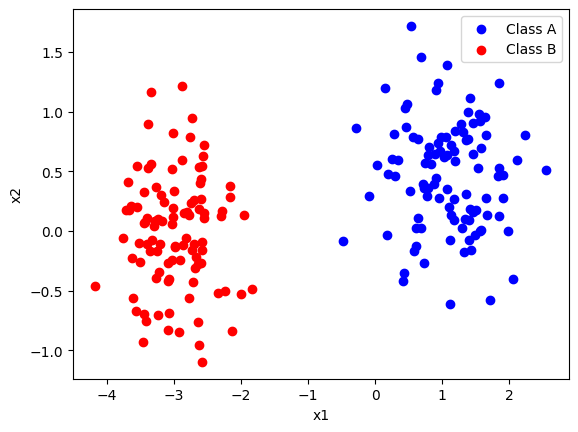

In [77]:
import matplotlib.pyplot as plt

plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()




In [78]:
# Create input data, with bias term (one extra dimension)
classABias = np.concatenate((classA, np.ones((1, n))), axis=0)
classBBias = np.concatenate((classB, np.ones((1, n))), axis=0)

# This is our input data (2 classes, with 2 dimensions for visualizatio in 2D plane + 1 deminsion for the bias term)
patterns = np.concatenate((classABias, classBBias), axis=1)

# Shuffle the inpput and target data, so we mix the classes
shuffled_indices = np.random.permutation(patterns.shape[1])

# Input data
patterns_shuffled = patterns[:, shuffled_indices]

# Target data (delta rule)
targetsDelta = np.concatenate((np.ones(classA.shape[1]), -np.ones(classB.shape[1])))
targetsDelta_shuffled = targetsDelta[shuffled_indices]

# Target data (perceptron rule)
targetsPerc = np.concatenate((np.ones(classA.shape[1]), np.zeros(classB.shape[1])))
targetsPerc_shuffled = targetsPerc[shuffled_indices]

In [5]:
print(patterns_shuffled.shape)

(3, 200)


In [ ]:
def treshold(y_pred):
    if y_pred > 0:
        return 1
    else:
        return 0

# Perceptron rule
def perceptron_rule(x, y):
    eta = 0.01
    # w = np.random.rand(1,3) # use this to insert randomness (will show how it iterates through until it finds a solution). Use this for presentation
    w = np.zeros((1,3))

    n = x.shape[1]
    convergence = False
    counter = 0

    while convergence != True:
        convergence = True

        for i in range(n):
            y_pred = np.dot(w, x[:, i])

            t_target = treshold(y_pred)

            if t_target == y[i]:
                continue
            elif t_target == 0 and y[i] == 1:
                w_delta = x[:, i] * eta
                convergence = False
            else:
                w_delta = x[:, i] * -eta
                convergence = False

            # Update weights
            w = w + np.transpose(w_delta)

        if not convergence:
            # Plot progress
            slope = -w[0, 0]/w[0, 1] # The slope of the boundary
            constant_term = -w[0, 2]/w[0, 1] # The constant term of the linear equation

            boundary_x = np.linspace(-4, 2, num=100, endpoint=True, retstep=False, dtype=None, axis=0, device=None)
            boundary_y = slope * boundary_x + constant_term


            plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
            plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
            plt.plot(boundary_x, boundary_y, color="black", label="Boundary")
            plt.xlabel("x1")
            plt.ylabel("x2")
            plt.legend()
            plt.show()
        counter += 1
        
    print(counter)

    return w

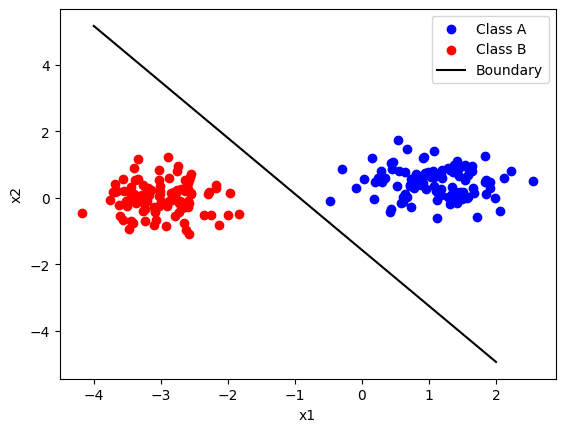

2
[0.01071401 0.00636089 0.01      ]


In [83]:
weights = perceptron_rule(x=patterns_shuffled, y=targetsPerc_shuffled)[0]

print(weights)